In [59]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [60]:
#reading the dataset
def read_dataset():
    df = pd.read_csv("./dataset/sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y = df[df.columns[60]]
    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y, y)

In [61]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [62]:
def plot_points(features, labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(features[normal, 0], features[normal, 1], 'bx')
    plt.plot(features[outliers, 0], features[outliers, 1], 'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

61
(207, 59)


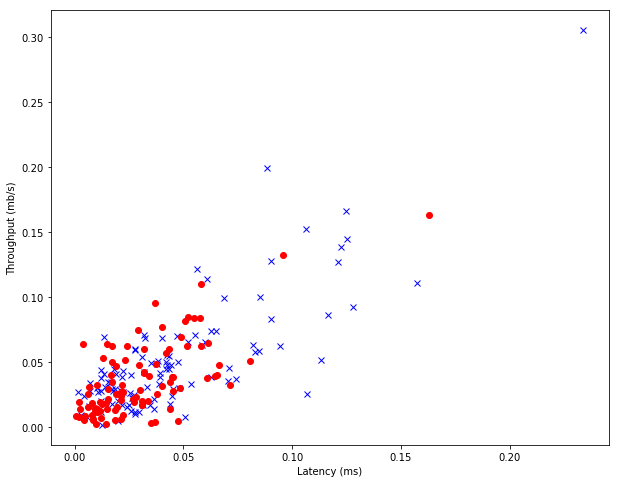

In [63]:
X, Y, y = read_dataset()
#plot the features and the labels
plot_points(X,y)

In [64]:
#Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
#convert the dataset into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=415)

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(165, 59)
(165, 2)
(42, 59)


### Set up your Network Hyper Parameters



In [66]:
# Training Parameters for basic MNIST
learning_rate = ??
training_epochs = ??
batch_size = ???

# Network Parameters
n_input = ??
n_hidden_1 = ?? 
n_hidden_2 = ?? 
n_classes = ??

SyntaxError: invalid syntax (<ipython-input-66-9c17fe7727c0>, line 2)

In [67]:
model = Sequential()
model.add(Dense(n_hidden_1, activation='relu',  input_shape=(n_input,), name = "Dense_1"))


model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 50)                3000      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 102       
Total params: 3,102
Trainable params: 3,102
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 165 samples, validate on 42 samples
Epoch 1/3000
165/165 [==============================] - 0s - loss: 0.7077 - acc: 0.4606 - val_loss: 0.7073 - val_acc: 0.4524
Epoch 2/3000
165/165 [==============================] - 0s - loss: 0.7034 - acc: 0.4545 - val_loss: 0.7042 - val_acc: 0.4524
Epoch 3/3000
165/165 [==============================] - 0s - loss: 0.6996 - acc: 0.4909 - val_loss: 0.7015 - val_acc: 0.4762
Epoch 4/3000
165/165 [==============================] - 0s - loss: 0.6962 - acc: 0.4788 - val_loss: 0.6993 - val_acc: 0.5714
Epoch 5/3000
165/165 [==============================] - 0s - loss: 0.6935 - acc: 0.5030 - val_loss: 0.6975 - val_acc: 0.5714
Epoch 6/3000
165/165 [==============================] - 0s - loss: 0.6918 - acc: 0.5152 - val_loss: 0.6961 - val_acc: 0.5714
Epoch 7/3000
165/165 [==============================] - 0s - loss: 0.6897 - acc: 0.5212 - val_loss: 0.6943 - val_acc: 0.5714
Epoch 8/3000
165/165 [==============================] - 0s - loss: 0.6870 - acc:

165/165 [==============================] - 0s - loss: 0.6436 - acc: 0.6061 - val_loss: 0.6516 - val_acc: 0.6190
Epoch 66/3000
165/165 [==============================] - 0s - loss: 0.6430 - acc: 0.6121 - val_loss: 0.6509 - val_acc: 0.6190
Epoch 67/3000
165/165 [==============================] - 0s - loss: 0.6424 - acc: 0.6182 - val_loss: 0.6503 - val_acc: 0.6190
Epoch 68/3000
165/165 [==============================] - 0s - loss: 0.6419 - acc: 0.6182 - val_loss: 0.6496 - val_acc: 0.6190
Epoch 69/3000
165/165 [==============================] - 0s - loss: 0.6415 - acc: 0.6424 - val_loss: 0.6492 - val_acc: 0.6190
Epoch 70/3000
165/165 [==============================] - 0s - loss: 0.6407 - acc: 0.6364 - val_loss: 0.6486 - val_acc: 0.6190
Epoch 71/3000
165/165 [==============================] - 0s - loss: 0.6402 - acc: 0.6364 - val_loss: 0.6481 - val_acc: 0.6190
Epoch 72/3000
165/165 [==============================] - 0s - loss: 0.6399 - acc: 0.6424 - val_loss: 0.6477 - val_acc: 0.6429
Epoch 

165/165 [==============================] - ETA: 0s - loss: 0.5974 - acc: 0.750 - 0s - loss: 0.6065 - acc: 0.7273 - val_loss: 0.6108 - val_acc: 0.7381
Epoch 130/3000
165/165 [==============================] - 0s - loss: 0.6061 - acc: 0.7273 - val_loss: 0.6104 - val_acc: 0.7381
Epoch 131/3000
165/165 [==============================] - 0s - loss: 0.6055 - acc: 0.7273 - val_loss: 0.6100 - val_acc: 0.7381
Epoch 132/3000
165/165 [==============================] - 0s - loss: 0.6053 - acc: 0.7333 - val_loss: 0.6093 - val_acc: 0.7381
Epoch 133/3000
165/165 [==============================] - 0s - loss: 0.6046 - acc: 0.7273 - val_loss: 0.6088 - val_acc: 0.7381
Epoch 134/3000
165/165 [==============================] - 0s - loss: 0.6042 - acc: 0.7273 - val_loss: 0.6083 - val_acc: 0.7381
Epoch 135/3000
165/165 [==============================] - 0s - loss: 0.6039 - acc: 0.7273 - val_loss: 0.6077 - val_acc: 0.7381
Epoch 136/3000
165/165 [==============================] - 0s - loss: 0.6042 - acc: 0.733

165/165 [==============================] - 0s - loss: 0.5803 - acc: 0.7515 - val_loss: 0.5831 - val_acc: 0.7857
Epoch 194/3000
165/165 [==============================] - 0s - loss: 0.5801 - acc: 0.7515 - val_loss: 0.5825 - val_acc: 0.7857
Epoch 195/3000
165/165 [==============================] - 0s - loss: 0.5795 - acc: 0.7515 - val_loss: 0.5821 - val_acc: 0.7857
Epoch 196/3000
165/165 [==============================] - 0s - loss: 0.5793 - acc: 0.7515 - val_loss: 0.5819 - val_acc: 0.7857
Epoch 197/3000
165/165 [==============================] - 0s - loss: 0.5788 - acc: 0.7515 - val_loss: 0.5814 - val_acc: 0.7857
Epoch 198/3000
165/165 [==============================] - 0s - loss: 0.5787 - acc: 0.7455 - val_loss: 0.5808 - val_acc: 0.8095
Epoch 199/3000
165/165 [==============================] - 0s - loss: 0.5781 - acc: 0.7515 - val_loss: 0.5805 - val_acc: 0.7857
Epoch 200/3000
165/165 [==============================] - 0s - loss: 0.5777 - acc: 0.7515 - val_loss: 0.5800 - val_acc: 0.7857

165/165 [==============================] - ETA: 0s - loss: 0.5407 - acc: 0.800 - 0s - loss: 0.5572 - acc: 0.7576 - val_loss: 0.5561 - val_acc: 0.7857
Epoch 257/3000
165/165 [==============================] - 0s - loss: 0.5568 - acc: 0.7636 - val_loss: 0.5558 - val_acc: 0.7857
Epoch 258/3000
165/165 [==============================] - 0s - loss: 0.5567 - acc: 0.7576 - val_loss: 0.5553 - val_acc: 0.7857
Epoch 259/3000
165/165 [==============================] - 0s - loss: 0.5561 - acc: 0.7576 - val_loss: 0.5549 - val_acc: 0.7857
Epoch 260/3000
165/165 [==============================] - 0s - loss: 0.5557 - acc: 0.7636 - val_loss: 0.5546 - val_acc: 0.7857
Epoch 261/3000
165/165 [==============================] - 0s - loss: 0.5554 - acc: 0.7636 - val_loss: 0.5544 - val_acc: 0.7857
Epoch 262/3000
165/165 [==============================] - 0s - loss: 0.5551 - acc: 0.7636 - val_loss: 0.5542 - val_acc: 0.7857
Epoch 263/3000
165/165 [==============================] - 0s - loss: 0.5547 - acc: 0.757

165/165 [==============================] - 0s - loss: 0.5362 - acc: 0.7758 - val_loss: 0.5325 - val_acc: 0.7857
Epoch 320/3000
165/165 [==============================] - 0s - loss: 0.5358 - acc: 0.7697 - val_loss: 0.5320 - val_acc: 0.8095
Epoch 321/3000
165/165 [==============================] - 0s - loss: 0.5355 - acc: 0.7758 - val_loss: 0.5316 - val_acc: 0.8095
Epoch 322/3000
165/165 [==============================] - 0s - loss: 0.5352 - acc: 0.7697 - val_loss: 0.5311 - val_acc: 0.8095
Epoch 323/3000
165/165 [==============================] - 0s - loss: 0.5348 - acc: 0.7758 - val_loss: 0.5308 - val_acc: 0.8095
Epoch 324/3000
165/165 [==============================] - 0s - loss: 0.5349 - acc: 0.7697 - val_loss: 0.5301 - val_acc: 0.7857
Epoch 325/3000
165/165 [==============================] - ETA: 0s - loss: 0.5170 - acc: 0.780 - 0s - loss: 0.5342 - acc: 0.7818 - val_loss: 0.5298 - val_acc: 0.7857
Epoch 326/3000
165/165 [==============================] - 0s - loss: 0.5340 - acc: 0.781

165/165 [==============================] - 0s - loss: 0.5164 - acc: 0.7939 - val_loss: 0.5089 - val_acc: 0.8095
Epoch 384/3000
165/165 [==============================] - 0s - loss: 0.5161 - acc: 0.7879 - val_loss: 0.5085 - val_acc: 0.8095
Epoch 385/3000
165/165 [==============================] - 0s - loss: 0.5157 - acc: 0.7879 - val_loss: 0.5082 - val_acc: 0.8095
Epoch 386/3000
165/165 [==============================] - 0s - loss: 0.5155 - acc: 0.7879 - val_loss: 0.5080 - val_acc: 0.8095
Epoch 387/3000
165/165 [==============================] - 0s - loss: 0.5153 - acc: 0.7939 - val_loss: 0.5078 - val_acc: 0.8095
Epoch 388/3000
165/165 [==============================] - 0s - loss: 0.5149 - acc: 0.7939 - val_loss: 0.5076 - val_acc: 0.8095
Epoch 389/3000
165/165 [==============================] - 0s - loss: 0.5146 - acc: 0.7939 - val_loss: 0.5072 - val_acc: 0.8095
Epoch 390/3000
165/165 [==============================] - 0s - loss: 0.5143 - acc: 0.7939 - val_loss: 0.5069 - val_acc: 0.8095

165/165 [==============================] - 0s - loss: 0.4988 - acc: 0.8000 - val_loss: 0.4881 - val_acc: 0.8333
Epoch 447/3000
165/165 [==============================] - 0s - loss: 0.4982 - acc: 0.7939 - val_loss: 0.4879 - val_acc: 0.8333
Epoch 448/3000
165/165 [==============================] - 0s - loss: 0.4980 - acc: 0.7939 - val_loss: 0.4877 - val_acc: 0.8095
Epoch 449/3000
165/165 [==============================] - 0s - loss: 0.4977 - acc: 0.8000 - val_loss: 0.4872 - val_acc: 0.8095
Epoch 450/3000
165/165 [==============================] - 0s - loss: 0.4979 - acc: 0.8061 - val_loss: 0.4872 - val_acc: 0.8095
Epoch 451/3000
165/165 [==============================] - 0s - loss: 0.4972 - acc: 0.8000 - val_loss: 0.4870 - val_acc: 0.8095
Epoch 452/3000
165/165 [==============================] - 0s - loss: 0.4969 - acc: 0.8000 - val_loss: 0.4867 - val_acc: 0.8095
Epoch 453/3000
165/165 [==============================] - 0s - loss: 0.4966 - acc: 0.8000 - val_loss: 0.4864 - val_acc: 0.8095

165/165 [==============================] - 0s - loss: 0.4820 - acc: 0.7939 - val_loss: 0.4695 - val_acc: 0.8333
Epoch 511/3000
165/165 [==============================] - ETA: 0s - loss: 0.4958 - acc: 0.770 - 0s - loss: 0.4818 - acc: 0.8000 - val_loss: 0.4694 - val_acc: 0.8333
Epoch 512/3000
165/165 [==============================] - 0s - loss: 0.4816 - acc: 0.7879 - val_loss: 0.4692 - val_acc: 0.8333
Epoch 513/3000
165/165 [==============================] - 0s - loss: 0.4812 - acc: 0.7879 - val_loss: 0.4690 - val_acc: 0.8333
Epoch 514/3000
165/165 [==============================] - 0s - loss: 0.4810 - acc: 0.7879 - val_loss: 0.4687 - val_acc: 0.8333
Epoch 515/3000
165/165 [==============================] - 0s - loss: 0.4808 - acc: 0.7879 - val_loss: 0.4684 - val_acc: 0.8333
Epoch 516/3000
165/165 [==============================] - 0s - loss: 0.4805 - acc: 0.7879 - val_loss: 0.4681 - val_acc: 0.8333
Epoch 517/3000
165/165 [==============================] - 0s - loss: 0.4805 - acc: 0.787

165/165 [==============================] - 0s - loss: 0.4674 - acc: 0.7939 - val_loss: 0.4535 - val_acc: 0.8571
Epoch 574/3000
165/165 [==============================] - 0s - loss: 0.4672 - acc: 0.8000 - val_loss: 0.4534 - val_acc: 0.8571
Epoch 575/3000
165/165 [==============================] - 0s - loss: 0.4669 - acc: 0.7939 - val_loss: 0.4532 - val_acc: 0.8571
Epoch 576/3000
165/165 [==============================] - 0s - loss: 0.4671 - acc: 0.7818 - val_loss: 0.4528 - val_acc: 0.8571
Epoch 577/3000
165/165 [==============================] - 0s - loss: 0.4666 - acc: 0.7879 - val_loss: 0.4526 - val_acc: 0.8571
Epoch 578/3000
165/165 [==============================] - ETA: 0s - loss: 0.4788 - acc: 0.780 - 0s - loss: 0.4662 - acc: 0.8000 - val_loss: 0.4524 - val_acc: 0.8571
Epoch 579/3000
165/165 [==============================] - 0s - loss: 0.4660 - acc: 0.8000 - val_loss: 0.4522 - val_acc: 0.8571
Epoch 580/3000
165/165 [==============================] - 0s - loss: 0.4665 - acc: 0.793

165/165 [==============================] - 0s - loss: 0.4543 - acc: 0.8061 - val_loss: 0.4398 - val_acc: 0.8571
Epoch 638/3000
165/165 [==============================] - 0s - loss: 0.4540 - acc: 0.8061 - val_loss: 0.4396 - val_acc: 0.8571
Epoch 639/3000
165/165 [==============================] - 0s - loss: 0.4540 - acc: 0.7879 - val_loss: 0.4393 - val_acc: 0.8571
Epoch 640/3000
165/165 [==============================] - 0s - loss: 0.4538 - acc: 0.8061 - val_loss: 0.4390 - val_acc: 0.8571
Epoch 641/3000
165/165 [==============================] - 0s - loss: 0.4535 - acc: 0.8061 - val_loss: 0.4388 - val_acc: 0.8571
Epoch 642/3000
165/165 [==============================] - 0s - loss: 0.4535 - acc: 0.8000 - val_loss: 0.4386 - val_acc: 0.8571
Epoch 643/3000
165/165 [==============================] - 0s - loss: 0.4530 - acc: 0.8061 - val_loss: 0.4384 - val_acc: 0.8571
Epoch 644/3000
165/165 [==============================] - 0s - loss: 0.4531 - acc: 0.8061 - val_loss: 0.4382 - val_acc: 0.8571

165/165 [==============================] - 0s - loss: 0.4427 - acc: 0.8061 - val_loss: 0.4269 - val_acc: 0.8571
Epoch 702/3000
165/165 [==============================] - 0s - loss: 0.4424 - acc: 0.8061 - val_loss: 0.4267 - val_acc: 0.8571
Epoch 703/3000
165/165 [==============================] - 0s - loss: 0.4424 - acc: 0.8061 - val_loss: 0.4266 - val_acc: 0.8571
Epoch 704/3000
165/165 [==============================] - 0s - loss: 0.4420 - acc: 0.8061 - val_loss: 0.4263 - val_acc: 0.8571
Epoch 705/3000
165/165 [==============================] - 0s - loss: 0.4416 - acc: 0.8061 - val_loss: 0.4261 - val_acc: 0.8571
Epoch 706/3000
165/165 [==============================] - 0s - loss: 0.4414 - acc: 0.8061 - val_loss: 0.4259 - val_acc: 0.8571
Epoch 707/3000
165/165 [==============================] - 0s - loss: 0.4414 - acc: 0.8061 - val_loss: 0.4257 - val_acc: 0.8571
Epoch 708/3000
165/165 [==============================] - 0s - loss: 0.4417 - acc: 0.8061 - val_loss: 0.4256 - val_acc: 0.8571

165/165 [==============================] - 0s - loss: 0.4317 - acc: 0.8121 - val_loss: 0.4155 - val_acc: 0.8810
Epoch 766/3000
165/165 [==============================] - 0s - loss: 0.4321 - acc: 0.8121 - val_loss: 0.4154 - val_acc: 0.8810
Epoch 767/3000
165/165 [==============================] - 0s - loss: 0.4314 - acc: 0.8182 - val_loss: 0.4151 - val_acc: 0.8810
Epoch 768/3000
165/165 [==============================] - 0s - loss: 0.4312 - acc: 0.8121 - val_loss: 0.4149 - val_acc: 0.8810
Epoch 769/3000
165/165 [==============================] - 0s - loss: 0.4310 - acc: 0.8121 - val_loss: 0.4147 - val_acc: 0.8810
Epoch 770/3000
165/165 [==============================] - 0s - loss: 0.4314 - acc: 0.8121 - val_loss: 0.4146 - val_acc: 0.8810
Epoch 771/3000
165/165 [==============================] - 0s - loss: 0.4307 - acc: 0.8182 - val_loss: 0.4145 - val_acc: 0.8810
Epoch 772/3000
165/165 [==============================] - 0s - loss: 0.4305 - acc: 0.8121 - val_loss: 0.4144 - val_acc: 0.8810

165/165 [==============================] - 0s - loss: 0.4219 - acc: 0.8182 - val_loss: 0.4055 - val_acc: 0.8810
Epoch 830/3000
165/165 [==============================] - 0s - loss: 0.4217 - acc: 0.8242 - val_loss: 0.4053 - val_acc: 0.8810
Epoch 831/3000
165/165 [==============================] - 0s - loss: 0.4222 - acc: 0.8182 - val_loss: 0.4052 - val_acc: 0.8810
Epoch 832/3000
165/165 [==============================] - 0s - loss: 0.4215 - acc: 0.8121 - val_loss: 0.4050 - val_acc: 0.8810
Epoch 833/3000
165/165 [==============================] - 0s - loss: 0.4212 - acc: 0.8182 - val_loss: 0.4049 - val_acc: 0.8810
Epoch 834/3000
165/165 [==============================] - 0s - loss: 0.4216 - acc: 0.8182 - val_loss: 0.4048 - val_acc: 0.8810
Epoch 835/3000
165/165 [==============================] - 0s - loss: 0.4211 - acc: 0.8121 - val_loss: 0.4047 - val_acc: 0.8810
Epoch 836/3000
165/165 [==============================] - 0s - loss: 0.4209 - acc: 0.8182 - val_loss: 0.4045 - val_acc: 0.8810

165/165 [==============================] - 0s - loss: 0.4126 - acc: 0.8242 - val_loss: 0.3978 - val_acc: 0.8810
Epoch 894/3000
165/165 [==============================] - 0s - loss: 0.4125 - acc: 0.8242 - val_loss: 0.3977 - val_acc: 0.8810
Epoch 895/3000
165/165 [==============================] - 0s - loss: 0.4125 - acc: 0.8242 - val_loss: 0.3977 - val_acc: 0.8810
Epoch 896/3000
165/165 [==============================] - 0s - loss: 0.4123 - acc: 0.8242 - val_loss: 0.3976 - val_acc: 0.8810
Epoch 897/3000
165/165 [==============================] - 0s - loss: 0.4123 - acc: 0.8242 - val_loss: 0.3975 - val_acc: 0.8810
Epoch 898/3000
165/165 [==============================] - 0s - loss: 0.4120 - acc: 0.8242 - val_loss: 0.3974 - val_acc: 0.8810
Epoch 899/3000
165/165 [==============================] - 0s - loss: 0.4118 - acc: 0.8242 - val_loss: 0.3973 - val_acc: 0.8810
Epoch 900/3000
165/165 [==============================] - 0s - loss: 0.4119 - acc: 0.8242 - val_loss: 0.3973 - val_acc: 0.8810

165/165 [==============================] - 0s - loss: 0.4036 - acc: 0.8242 - val_loss: 0.3909 - val_acc: 0.8810
Epoch 958/3000
165/165 [==============================] - 0s - loss: 0.4038 - acc: 0.8242 - val_loss: 0.3907 - val_acc: 0.8810
Epoch 959/3000
165/165 [==============================] - 0s - loss: 0.4033 - acc: 0.8242 - val_loss: 0.3907 - val_acc: 0.8810
Epoch 960/3000
165/165 [==============================] - 0s - loss: 0.4032 - acc: 0.8242 - val_loss: 0.3906 - val_acc: 0.8810
Epoch 961/3000
165/165 [==============================] - 0s - loss: 0.4029 - acc: 0.8242 - val_loss: 0.3906 - val_acc: 0.8810
Epoch 962/3000
165/165 [==============================] - 0s - loss: 0.4032 - acc: 0.8242 - val_loss: 0.3906 - val_acc: 0.8810
Epoch 963/3000
165/165 [==============================] - 0s - loss: 0.4034 - acc: 0.8242 - val_loss: 0.3904 - val_acc: 0.8810
Epoch 964/3000
165/165 [==============================] - 0s - loss: 0.4029 - acc: 0.8303 - val_loss: 0.3904 - val_acc: 0.8810

165/165 [==============================] - 0s - loss: 0.3953 - acc: 0.8242 - val_loss: 0.3841 - val_acc: 0.8810
Epoch 1022/3000
165/165 [==============================] - 0s - loss: 0.3951 - acc: 0.8364 - val_loss: 0.3838 - val_acc: 0.8810
Epoch 1023/3000
165/165 [==============================] - 0s - loss: 0.3953 - acc: 0.8303 - val_loss: 0.3836 - val_acc: 0.8810
Epoch 1024/3000
165/165 [==============================] - 0s - loss: 0.3949 - acc: 0.8303 - val_loss: 0.3837 - val_acc: 0.8810
Epoch 1025/3000
165/165 [==============================] - 0s - loss: 0.3946 - acc: 0.8303 - val_loss: 0.3836 - val_acc: 0.8810
Epoch 1026/3000
165/165 [==============================] - 0s - loss: 0.3945 - acc: 0.8364 - val_loss: 0.3836 - val_acc: 0.8810
Epoch 1027/3000
165/165 [==============================] - 0s - loss: 0.3942 - acc: 0.8303 - val_loss: 0.3834 - val_acc: 0.8810
Epoch 1028/3000
165/165 [==============================] - 0s - loss: 0.3946 - acc: 0.8303 - val_loss: 0.3832 - val_acc:

165/165 [==============================] - 0s - loss: 0.3878 - acc: 0.8364 - val_loss: 0.3772 - val_acc: 0.9048
Epoch 1085/3000
165/165 [==============================] - 0s - loss: 0.3876 - acc: 0.8364 - val_loss: 0.3772 - val_acc: 0.8810
Epoch 1086/3000
165/165 [==============================] - 0s - loss: 0.3873 - acc: 0.8364 - val_loss: 0.3771 - val_acc: 0.8810
Epoch 1087/3000
165/165 [==============================] - 0s - loss: 0.3873 - acc: 0.8364 - val_loss: 0.3771 - val_acc: 0.8810
Epoch 1088/3000
165/165 [==============================] - 0s - loss: 0.3870 - acc: 0.8303 - val_loss: 0.3770 - val_acc: 0.8810
Epoch 1089/3000
165/165 [==============================] - 0s - loss: 0.3874 - acc: 0.8364 - val_loss: 0.3770 - val_acc: 0.8810
Epoch 1090/3000
165/165 [==============================] - 0s - loss: 0.3872 - acc: 0.8485 - val_loss: 0.3770 - val_acc: 0.8810
Epoch 1091/3000
165/165 [==============================] - 0s - loss: 0.3869 - acc: 0.8485 - val_loss: 0.3766 - val_acc:

165/165 [==============================] - 0s - loss: 0.3803 - acc: 0.8485 - val_loss: 0.3710 - val_acc: 0.9048
Epoch 1148/3000
165/165 [==============================] - 0s - loss: 0.3805 - acc: 0.8485 - val_loss: 0.3708 - val_acc: 0.9048
Epoch 1149/3000
165/165 [==============================] - 0s - loss: 0.3801 - acc: 0.8485 - val_loss: 0.3707 - val_acc: 0.9048
Epoch 1150/3000
165/165 [==============================] - 0s - loss: 0.3803 - acc: 0.8545 - val_loss: 0.3705 - val_acc: 0.9048
Epoch 1151/3000
165/165 [==============================] - 0s - loss: 0.3800 - acc: 0.8485 - val_loss: 0.3705 - val_acc: 0.9048
Epoch 1152/3000
165/165 [==============================] - 0s - loss: 0.3796 - acc: 0.8606 - val_loss: 0.3704 - val_acc: 0.9048
Epoch 1153/3000
165/165 [==============================] - 0s - loss: 0.3795 - acc: 0.8606 - val_loss: 0.3703 - val_acc: 0.9048
Epoch 1154/3000
165/165 [==============================] - 0s - loss: 0.3794 - acc: 0.8545 - val_loss: 0.3702 - val_acc:

165/165 [==============================] - 0s - loss: 0.3722 - acc: 0.8606 - val_loss: 0.3655 - val_acc: 0.9048
Epoch 1211/3000
165/165 [==============================] - 0s - loss: 0.3727 - acc: 0.8667 - val_loss: 0.3654 - val_acc: 0.9048
Epoch 1212/3000
165/165 [==============================] - 0s - loss: 0.3721 - acc: 0.8545 - val_loss: 0.3653 - val_acc: 0.9048
Epoch 1213/3000
165/165 [==============================] - 0s - loss: 0.3719 - acc: 0.8606 - val_loss: 0.3652 - val_acc: 0.9048
Epoch 1214/3000
165/165 [==============================] - 0s - loss: 0.3717 - acc: 0.8606 - val_loss: 0.3652 - val_acc: 0.9048
Epoch 1215/3000
165/165 [==============================] - 0s - loss: 0.3716 - acc: 0.8606 - val_loss: 0.3650 - val_acc: 0.9048
Epoch 1216/3000
165/165 [==============================] - 0s - loss: 0.3714 - acc: 0.8667 - val_loss: 0.3649 - val_acc: 0.9048
Epoch 1217/3000
165/165 [==============================] - 0s - loss: 0.3718 - acc: 0.8606 - val_loss: 0.3650 - val_acc:

165/165 [==============================] - 0s - loss: 0.3652 - acc: 0.8606 - val_loss: 0.3598 - val_acc: 0.9048
Epoch 1274/3000
165/165 [==============================] - 0s - loss: 0.3656 - acc: 0.8545 - val_loss: 0.3598 - val_acc: 0.9048
Epoch 1275/3000
165/165 [==============================] - 0s - loss: 0.3651 - acc: 0.8606 - val_loss: 0.3596 - val_acc: 0.9048
Epoch 1276/3000
165/165 [==============================] - 0s - loss: 0.3649 - acc: 0.8606 - val_loss: 0.3596 - val_acc: 0.9048
Epoch 1277/3000
165/165 [==============================] - 0s - loss: 0.3657 - acc: 0.8606 - val_loss: 0.3596 - val_acc: 0.9048
Epoch 1278/3000
165/165 [==============================] - 0s - loss: 0.3647 - acc: 0.8606 - val_loss: 0.3595 - val_acc: 0.9048
Epoch 1279/3000
165/165 [==============================] - 0s - loss: 0.3645 - acc: 0.8606 - val_loss: 0.3594 - val_acc: 0.9048
Epoch 1280/3000
165/165 [==============================] - 0s - loss: 0.3645 - acc: 0.8606 - val_loss: 0.3593 - val_acc:

165/165 [==============================] - 0s - loss: 0.3588 - acc: 0.8606 - val_loss: 0.3542 - val_acc: 0.9048
Epoch 1338/3000
165/165 [==============================] - 0s - loss: 0.3585 - acc: 0.8606 - val_loss: 0.3541 - val_acc: 0.9048
Epoch 1339/3000
165/165 [==============================] - 0s - loss: 0.3588 - acc: 0.8606 - val_loss: 0.3541 - val_acc: 0.9048
Epoch 1340/3000
165/165 [==============================] - 0s - loss: 0.3584 - acc: 0.8606 - val_loss: 0.3539 - val_acc: 0.9048
Epoch 1341/3000
165/165 [==============================] - 0s - loss: 0.3583 - acc: 0.8606 - val_loss: 0.3538 - val_acc: 0.9048
Epoch 1342/3000
165/165 [==============================] - 0s - loss: 0.3581 - acc: 0.8606 - val_loss: 0.3538 - val_acc: 0.9048
Epoch 1343/3000
165/165 [==============================] - 0s - loss: 0.3581 - acc: 0.8606 - val_loss: 0.3536 - val_acc: 0.9048
Epoch 1344/3000
165/165 [==============================] - 0s - loss: 0.3580 - acc: 0.8606 - val_loss: 0.3536 - val_acc:

165/165 [==============================] - 0s - loss: 0.3526 - acc: 0.8606 - val_loss: 0.3494 - val_acc: 0.9048
Epoch 1400/3000
165/165 [==============================] - 0s - loss: 0.3524 - acc: 0.8606 - val_loss: 0.3493 - val_acc: 0.9048
Epoch 1401/3000
165/165 [==============================] - ETA: 0s - loss: 0.3450 - acc: 0.850 - 0s - loss: 0.3527 - acc: 0.8606 - val_loss: 0.3490 - val_acc: 0.9048
Epoch 1402/3000
165/165 [==============================] - 0s - loss: 0.3525 - acc: 0.8606 - val_loss: 0.3492 - val_acc: 0.9048
Epoch 1403/3000
165/165 [==============================] - 0s - loss: 0.3521 - acc: 0.8606 - val_loss: 0.3490 - val_acc: 0.9048
Epoch 1404/3000
165/165 [==============================] - 0s - loss: 0.3520 - acc: 0.8606 - val_loss: 0.3489 - val_acc: 0.9048
Epoch 1405/3000
165/165 [==============================] - 0s - loss: 0.3519 - acc: 0.8606 - val_loss: 0.3488 - val_acc: 0.9048
Epoch 1406/3000
165/165 [==============================] - 0s - loss: 0.3523 - acc

165/165 [==============================] - 0s - loss: 0.3467 - acc: 0.8606 - val_loss: 0.3440 - val_acc: 0.9048
Epoch 1463/3000
165/165 [==============================] - 0s - loss: 0.3463 - acc: 0.8606 - val_loss: 0.3440 - val_acc: 0.9048
Epoch 1464/3000
165/165 [==============================] - 0s - loss: 0.3462 - acc: 0.8606 - val_loss: 0.3440 - val_acc: 0.9048
Epoch 1465/3000
165/165 [==============================] - 0s - loss: 0.3466 - acc: 0.8606 - val_loss: 0.3437 - val_acc: 0.9048
Epoch 1466/3000
165/165 [==============================] - 0s - loss: 0.3461 - acc: 0.8606 - val_loss: 0.3438 - val_acc: 0.9048
Epoch 1467/3000
165/165 [==============================] - 0s - loss: 0.3461 - acc: 0.8606 - val_loss: 0.3438 - val_acc: 0.9048
Epoch 1468/3000
165/165 [==============================] - 0s - loss: 0.3459 - acc: 0.8606 - val_loss: 0.3437 - val_acc: 0.9048
Epoch 1469/3000
165/165 [==============================] - 0s - loss: 0.3458 - acc: 0.8606 - val_loss: 0.3436 - val_acc:

165/165 [==============================] - 0s - loss: 0.3407 - acc: 0.8606 - val_loss: 0.3399 - val_acc: 0.9048
Epoch 1527/3000
165/165 [==============================] - 0s - loss: 0.3404 - acc: 0.8606 - val_loss: 0.3399 - val_acc: 0.9048
Epoch 1528/3000
165/165 [==============================] - 0s - loss: 0.3410 - acc: 0.8606 - val_loss: 0.3399 - val_acc: 0.9048
Epoch 1529/3000
165/165 [==============================] - 0s - loss: 0.3403 - acc: 0.8606 - val_loss: 0.3397 - val_acc: 0.9048
Epoch 1530/3000
165/165 [==============================] - 0s - loss: 0.3426 - acc: 0.8606 - val_loss: 0.3400 - val_acc: 0.9048
Epoch 1531/3000
165/165 [==============================] - ETA: 0s - loss: 0.3489 - acc: 0.850 - 0s - loss: 0.3403 - acc: 0.8667 - val_loss: 0.3397 - val_acc: 0.9048
Epoch 1532/3000
165/165 [==============================] - 0s - loss: 0.3400 - acc: 0.8606 - val_loss: 0.3396 - val_acc: 0.9048
Epoch 1533/3000
165/165 [==============================] - 0s - loss: 0.3400 - acc

165/165 [==============================] - 0s - loss: 0.3351 - acc: 0.8606 - val_loss: 0.3359 - val_acc: 0.9048
Epoch 1590/3000
165/165 [==============================] - 0s - loss: 0.3352 - acc: 0.8606 - val_loss: 0.3361 - val_acc: 0.9048
Epoch 1591/3000
165/165 [==============================] - 0s - loss: 0.3348 - acc: 0.8606 - val_loss: 0.3359 - val_acc: 0.9048
Epoch 1592/3000
165/165 [==============================] - 0s - loss: 0.3347 - acc: 0.8606 - val_loss: 0.3357 - val_acc: 0.9048
Epoch 1593/3000
165/165 [==============================] - 0s - loss: 0.3347 - acc: 0.8606 - val_loss: 0.3356 - val_acc: 0.9048
Epoch 1594/3000
165/165 [==============================] - 0s - loss: 0.3345 - acc: 0.8606 - val_loss: 0.3355 - val_acc: 0.9048
Epoch 1595/3000
165/165 [==============================] - 0s - loss: 0.3348 - acc: 0.8667 - val_loss: 0.3354 - val_acc: 0.9048
Epoch 1596/3000
165/165 [==============================] - 0s - loss: 0.3344 - acc: 0.8606 - val_loss: 0.3353 - val_acc:

165/165 [==============================] - 0s - loss: 0.3296 - acc: 0.8667 - val_loss: 0.3318 - val_acc: 0.9048
Epoch 1653/3000
165/165 [==============================] - 0s - loss: 0.3305 - acc: 0.8788 - val_loss: 0.3319 - val_acc: 0.9048
Epoch 1654/3000
165/165 [==============================] - 0s - loss: 0.3294 - acc: 0.8667 - val_loss: 0.3317 - val_acc: 0.9048
Epoch 1655/3000
165/165 [==============================] - 0s - loss: 0.3295 - acc: 0.8667 - val_loss: 0.3316 - val_acc: 0.9048
Epoch 1656/3000
165/165 [==============================] - 0s - loss: 0.3298 - acc: 0.8606 - val_loss: 0.3315 - val_acc: 0.9048
Epoch 1657/3000
165/165 [==============================] - 0s - loss: 0.3294 - acc: 0.8727 - val_loss: 0.3314 - val_acc: 0.9048
Epoch 1658/3000
165/165 [==============================] - 0s - loss: 0.3290 - acc: 0.8727 - val_loss: 0.3313 - val_acc: 0.9048
Epoch 1659/3000
165/165 [==============================] - 0s - loss: 0.3290 - acc: 0.8667 - val_loss: 0.3311 - val_acc:

165/165 [==============================] - 0s - loss: 0.3245 - acc: 0.8788 - val_loss: 0.3282 - val_acc: 0.9048
Epoch 1716/3000
165/165 [==============================] - 0s - loss: 0.3242 - acc: 0.8788 - val_loss: 0.3282 - val_acc: 0.9048
Epoch 1717/3000
165/165 [==============================] - 0s - loss: 0.3241 - acc: 0.8788 - val_loss: 0.3283 - val_acc: 0.9048
Epoch 1718/3000
165/165 [==============================] - 0s - loss: 0.3248 - acc: 0.8727 - val_loss: 0.3282 - val_acc: 0.9048
Epoch 1719/3000
165/165 [==============================] - 0s - loss: 0.3240 - acc: 0.8727 - val_loss: 0.3280 - val_acc: 0.9048
Epoch 1720/3000
165/165 [==============================] - 0s - loss: 0.3247 - acc: 0.8788 - val_loss: 0.3280 - val_acc: 0.9048
Epoch 1721/3000
165/165 [==============================] - 0s - loss: 0.3238 - acc: 0.8727 - val_loss: 0.3279 - val_acc: 0.9048
Epoch 1722/3000
165/165 [==============================] - ETA: 0s - loss: 0.3517 - acc: 0.850 - 0s - loss: 0.3236 - acc

165/165 [==============================] - 0s - loss: 0.3196 - acc: 0.8788 - val_loss: 0.3251 - val_acc: 0.9286
Epoch 1779/3000
165/165 [==============================] - 0s - loss: 0.3194 - acc: 0.8788 - val_loss: 0.3249 - val_acc: 0.9286
Epoch 1780/3000
165/165 [==============================] - 0s - loss: 0.3187 - acc: 0.8788 - val_loss: 0.3248 - val_acc: 0.9048
Epoch 1781/3000
165/165 [==============================] - 0s - loss: 0.3188 - acc: 0.8788 - val_loss: 0.3245 - val_acc: 0.9048
Epoch 1782/3000
165/165 [==============================] - 0s - loss: 0.3197 - acc: 0.8788 - val_loss: 0.3244 - val_acc: 0.9286
Epoch 1783/3000
165/165 [==============================] - 0s - loss: 0.3197 - acc: 0.8788 - val_loss: 0.3243 - val_acc: 0.9048
Epoch 1784/3000
165/165 [==============================] - 0s - loss: 0.3192 - acc: 0.8788 - val_loss: 0.3242 - val_acc: 0.9286
Epoch 1785/3000
165/165 [==============================] - 0s - loss: 0.3184 - acc: 0.8848 - val_loss: 0.3242 - val_acc:

165/165 [==============================] - 0s - loss: 0.3138 - acc: 0.8788 - val_loss: 0.3213 - val_acc: 0.9048
Epoch 1842/3000
165/165 [==============================] - 0s - loss: 0.3137 - acc: 0.8788 - val_loss: 0.3214 - val_acc: 0.9286
Epoch 1843/3000
165/165 [==============================] - 0s - loss: 0.3140 - acc: 0.8848 - val_loss: 0.3214 - val_acc: 0.9286
Epoch 1844/3000
165/165 [==============================] - 0s - loss: 0.3136 - acc: 0.8848 - val_loss: 0.3211 - val_acc: 0.9286
Epoch 1845/3000
165/165 [==============================] - 0s - loss: 0.3133 - acc: 0.8848 - val_loss: 0.3211 - val_acc: 0.9286
Epoch 1846/3000
165/165 [==============================] - 0s - loss: 0.3133 - acc: 0.8848 - val_loss: 0.3211 - val_acc: 0.9286
Epoch 1847/3000
165/165 [==============================] - 0s - loss: 0.3133 - acc: 0.8788 - val_loss: 0.3211 - val_acc: 0.9286
Epoch 1848/3000
165/165 [==============================] - 0s - loss: 0.3131 - acc: 0.8848 - val_loss: 0.3209 - val_acc:

165/165 [==============================] - 0s - loss: 0.3085 - acc: 0.8848 - val_loss: 0.3182 - val_acc: 0.9286
Epoch 1905/3000
165/165 [==============================] - 0s - loss: 0.3090 - acc: 0.8909 - val_loss: 0.3181 - val_acc: 0.9286
Epoch 1906/3000
165/165 [==============================] - 0s - loss: 0.3084 - acc: 0.8848 - val_loss: 0.3179 - val_acc: 0.9286
Epoch 1907/3000
165/165 [==============================] - ETA: 0s - loss: 0.3575 - acc: 0.840 - 0s - loss: 0.3089 - acc: 0.8909 - val_loss: 0.3179 - val_acc: 0.9286
Epoch 1908/3000
165/165 [==============================] - 0s - loss: 0.3083 - acc: 0.8909 - val_loss: 0.3180 - val_acc: 0.9286
Epoch 1909/3000
165/165 [==============================] - 0s - loss: 0.3083 - acc: 0.8909 - val_loss: 0.3179 - val_acc: 0.9286
Epoch 1910/3000
165/165 [==============================] - 0s - loss: 0.3083 - acc: 0.8848 - val_loss: 0.3181 - val_acc: 0.9286
Epoch 1911/3000
165/165 [==============================] - 0s - loss: 0.3079 - acc

165/165 [==============================] - 0s - loss: 0.3036 - acc: 0.8909 - val_loss: 0.3157 - val_acc: 0.9286
Epoch 1967/3000
165/165 [==============================] - ETA: 0s - loss: 0.2854 - acc: 0.890 - 0s - loss: 0.3035 - acc: 0.8909 - val_loss: 0.3155 - val_acc: 0.9286
Epoch 1968/3000
165/165 [==============================] - 0s - loss: 0.3034 - acc: 0.8848 - val_loss: 0.3155 - val_acc: 0.9286
Epoch 1969/3000
165/165 [==============================] - ETA: 0s - loss: 0.2948 - acc: 0.890 - 0s - loss: 0.3035 - acc: 0.8848 - val_loss: 0.3155 - val_acc: 0.9286
Epoch 1970/3000
165/165 [==============================] - ETA: 0s - loss: 0.3099 - acc: 0.900 - 0s - loss: 0.3047 - acc: 0.8848 - val_loss: 0.3154 - val_acc: 0.9286
Epoch 1971/3000
165/165 [==============================] - 0s - loss: 0.3036 - acc: 0.8848 - val_loss: 0.3154 - val_acc: 0.9286
Epoch 1972/3000
165/165 [==============================] - 0s - loss: 0.3030 - acc: 0.8909 - val_loss: 0.3154 - val_acc: 0.9286
Epoch 

165/165 [==============================] - 0s - loss: 0.2987 - acc: 0.8909 - val_loss: 0.3126 - val_acc: 0.9286
Epoch 2028/3000
165/165 [==============================] - 0s - loss: 0.2990 - acc: 0.8909 - val_loss: 0.3125 - val_acc: 0.9286
Epoch 2029/3000
165/165 [==============================] - 0s - loss: 0.2986 - acc: 0.8970 - val_loss: 0.3124 - val_acc: 0.9286
Epoch 2030/3000
165/165 [==============================] - 0s - loss: 0.2985 - acc: 0.8909 - val_loss: 0.3126 - val_acc: 0.9286
Epoch 2031/3000
165/165 [==============================] - 0s - loss: 0.2989 - acc: 0.8909 - val_loss: 0.3124 - val_acc: 0.9286
Epoch 2032/3000
165/165 [==============================] - 0s - loss: 0.2984 - acc: 0.8909 - val_loss: 0.3126 - val_acc: 0.9286
Epoch 2033/3000
165/165 [==============================] - 0s - loss: 0.2982 - acc: 0.8970 - val_loss: 0.3124 - val_acc: 0.9286
Epoch 2034/3000
165/165 [==============================] - 0s - loss: 0.2983 - acc: 0.8909 - val_loss: 0.3125 - val_acc:

165/165 [==============================] - 0s - loss: 0.2941 - acc: 0.8909 - val_loss: 0.3099 - val_acc: 0.9286
Epoch 2091/3000
165/165 [==============================] - 0s - loss: 0.2939 - acc: 0.8909 - val_loss: 0.3097 - val_acc: 0.9286
Epoch 2092/3000
165/165 [==============================] - 0s - loss: 0.2937 - acc: 0.8909 - val_loss: 0.3095 - val_acc: 0.9286
Epoch 2093/3000
165/165 [==============================] - 0s - loss: 0.2936 - acc: 0.8909 - val_loss: 0.3095 - val_acc: 0.9286
Epoch 2094/3000
165/165 [==============================] - 0s - loss: 0.2940 - acc: 0.9030 - val_loss: 0.3094 - val_acc: 0.9286
Epoch 2095/3000
165/165 [==============================] - 0s - loss: 0.2937 - acc: 0.8909 - val_loss: 0.3096 - val_acc: 0.9286
Epoch 2096/3000
165/165 [==============================] - 0s - loss: 0.2935 - acc: 0.8909 - val_loss: 0.3093 - val_acc: 0.9286
Epoch 2097/3000
165/165 [==============================] - 0s - loss: 0.2935 - acc: 0.8909 - val_loss: 0.3095 - val_acc:

165/165 [==============================] - 0s - loss: 0.2901 - acc: 0.9030 - val_loss: 0.3072 - val_acc: 0.9286
Epoch 2153/3000
165/165 [==============================] - 0s - loss: 0.2892 - acc: 0.8909 - val_loss: 0.3071 - val_acc: 0.9286
Epoch 2154/3000
165/165 [==============================] - 0s - loss: 0.2893 - acc: 0.8909 - val_loss: 0.3070 - val_acc: 0.9286
Epoch 2155/3000
165/165 [==============================] - 0s - loss: 0.2893 - acc: 0.8970 - val_loss: 0.3069 - val_acc: 0.9286
Epoch 2156/3000
165/165 [==============================] - 0s - loss: 0.2891 - acc: 0.9030 - val_loss: 0.3069 - val_acc: 0.9286
Epoch 2157/3000
165/165 [==============================] - 0s - loss: 0.2891 - acc: 0.8970 - val_loss: 0.3069 - val_acc: 0.9286
Epoch 2158/3000
165/165 [==============================] - 0s - loss: 0.2889 - acc: 0.8909 - val_loss: 0.3070 - val_acc: 0.9286
Epoch 2159/3000
165/165 [==============================] - 0s - loss: 0.2887 - acc: 0.8909 - val_loss: 0.3067 - val_acc:

165/165 [==============================] - 0s - loss: 0.2847 - acc: 0.9091 - val_loss: 0.3048 - val_acc: 0.9286
Epoch 2216/3000
165/165 [==============================] - 0s - loss: 0.2847 - acc: 0.9091 - val_loss: 0.3046 - val_acc: 0.9286
Epoch 2217/3000
165/165 [==============================] - 0s - loss: 0.2846 - acc: 0.9030 - val_loss: 0.3044 - val_acc: 0.9286
Epoch 2218/3000
165/165 [==============================] - 0s - loss: 0.2850 - acc: 0.8970 - val_loss: 0.3042 - val_acc: 0.9286
Epoch 2219/3000
165/165 [==============================] - 0s - loss: 0.2845 - acc: 0.9091 - val_loss: 0.3041 - val_acc: 0.9286
Epoch 2220/3000
165/165 [==============================] - 0s - loss: 0.2844 - acc: 0.9030 - val_loss: 0.3042 - val_acc: 0.9286
Epoch 2221/3000
165/165 [==============================] - 0s - loss: 0.2842 - acc: 0.9091 - val_loss: 0.3043 - val_acc: 0.9286
Epoch 2222/3000
165/165 [==============================] - 0s - loss: 0.2843 - acc: 0.9091 - val_loss: 0.3043 - val_acc:

165/165 [==============================] - 0s - loss: 0.2801 - acc: 0.9091 - val_loss: 0.3025 - val_acc: 0.9286
Epoch 2279/3000
165/165 [==============================] - 0s - loss: 0.2801 - acc: 0.9091 - val_loss: 0.3024 - val_acc: 0.9286
Epoch 2280/3000
165/165 [==============================] - 0s - loss: 0.2798 - acc: 0.9091 - val_loss: 0.3024 - val_acc: 0.9286
Epoch 2281/3000
165/165 [==============================] - 0s - loss: 0.2799 - acc: 0.9091 - val_loss: 0.3023 - val_acc: 0.9286
Epoch 2282/3000
165/165 [==============================] - 0s - loss: 0.2798 - acc: 0.9091 - val_loss: 0.3022 - val_acc: 0.9286
Epoch 2283/3000
165/165 [==============================] - 0s - loss: 0.2802 - acc: 0.9030 - val_loss: 0.3021 - val_acc: 0.9286
Epoch 2284/3000
165/165 [==============================] - 0s - loss: 0.2800 - acc: 0.9091 - val_loss: 0.3024 - val_acc: 0.9286
Epoch 2285/3000
165/165 [==============================] - 0s - loss: 0.2801 - acc: 0.9091 - val_loss: 0.3021 - val_acc:

165/165 [==============================] - 0s - loss: 0.2754 - acc: 0.9091 - val_loss: 0.3005 - val_acc: 0.9286
Epoch 2342/3000
165/165 [==============================] - 0s - loss: 0.2754 - acc: 0.9091 - val_loss: 0.3002 - val_acc: 0.9286
Epoch 2343/3000
165/165 [==============================] - 0s - loss: 0.2757 - acc: 0.9091 - val_loss: 0.3005 - val_acc: 0.9286
Epoch 2344/3000
165/165 [==============================] - 0s - loss: 0.2753 - acc: 0.9091 - val_loss: 0.3005 - val_acc: 0.9048
Epoch 2345/3000
165/165 [==============================] - 0s - loss: 0.2755 - acc: 0.9030 - val_loss: 0.3002 - val_acc: 0.9286
Epoch 2346/3000
165/165 [==============================] - 0s - loss: 0.2752 - acc: 0.9091 - val_loss: 0.3003 - val_acc: 0.9286
Epoch 2347/3000
165/165 [==============================] - ETA: 0s - loss: 0.2755 - acc: 0.920 - 0s - loss: 0.2755 - acc: 0.9091 - val_loss: 0.3003 - val_acc: 0.9048
Epoch 2348/3000
165/165 [==============================] - 0s - loss: 0.2750 - acc

165/165 [==============================] - 0s - loss: 0.2712 - acc: 0.9091 - val_loss: 0.2989 - val_acc: 0.9286
Epoch 2404/3000
165/165 [==============================] - 0s - loss: 0.2711 - acc: 0.9091 - val_loss: 0.2988 - val_acc: 0.9048
Epoch 2405/3000
165/165 [==============================] - 0s - loss: 0.2710 - acc: 0.9091 - val_loss: 0.2988 - val_acc: 0.9048
Epoch 2406/3000
165/165 [==============================] - 0s - loss: 0.2719 - acc: 0.9091 - val_loss: 0.2989 - val_acc: 0.9048
Epoch 2407/3000
165/165 [==============================] - 0s - loss: 0.2715 - acc: 0.9091 - val_loss: 0.2989 - val_acc: 0.9048
Epoch 2408/3000
165/165 [==============================] - 0s - loss: 0.2711 - acc: 0.9030 - val_loss: 0.2990 - val_acc: 0.9048
Epoch 2409/3000
165/165 [==============================] - 0s - loss: 0.2708 - acc: 0.9091 - val_loss: 0.2987 - val_acc: 0.9048
Epoch 2410/3000
165/165 [==============================] - 0s - loss: 0.2709 - acc: 0.9091 - val_loss: 0.2988 - val_acc:

165/165 [==============================] - 0s - loss: 0.2670 - acc: 0.9091 - val_loss: 0.2962 - val_acc: 0.9048
Epoch 2467/3000
165/165 [==============================] - 0s - loss: 0.2666 - acc: 0.9091 - val_loss: 0.2962 - val_acc: 0.9048
Epoch 2468/3000
165/165 [==============================] - 0s - loss: 0.2664 - acc: 0.9091 - val_loss: 0.2961 - val_acc: 0.9048
Epoch 2469/3000
165/165 [==============================] - 0s - loss: 0.2664 - acc: 0.9091 - val_loss: 0.2963 - val_acc: 0.9048
Epoch 2470/3000
165/165 [==============================] - 0s - loss: 0.2663 - acc: 0.9091 - val_loss: 0.2960 - val_acc: 0.9048
Epoch 2471/3000
165/165 [==============================] - 0s - loss: 0.2663 - acc: 0.9091 - val_loss: 0.2958 - val_acc: 0.9048
Epoch 2472/3000
165/165 [==============================] - ETA: 0s - loss: 0.2874 - acc: 0.890 - 0s - loss: 0.2662 - acc: 0.9091 - val_loss: 0.2957 - val_acc: 0.9048
Epoch 2473/3000
165/165 [==============================] - 0s - loss: 0.2662 - acc

165/165 [==============================] - 0s - loss: 0.2622 - acc: 0.9091 - val_loss: 0.2940 - val_acc: 0.9048
Epoch 2530/3000
165/165 [==============================] - 0s - loss: 0.2623 - acc: 0.9091 - val_loss: 0.2936 - val_acc: 0.9048
Epoch 2531/3000
165/165 [==============================] - 0s - loss: 0.2620 - acc: 0.9152 - val_loss: 0.2939 - val_acc: 0.9048
Epoch 2532/3000
165/165 [==============================] - 0s - loss: 0.2621 - acc: 0.9091 - val_loss: 0.2936 - val_acc: 0.9048
Epoch 2533/3000
165/165 [==============================] - 0s - loss: 0.2619 - acc: 0.9152 - val_loss: 0.2939 - val_acc: 0.9048
Epoch 2534/3000
165/165 [==============================] - 0s - loss: 0.2618 - acc: 0.9152 - val_loss: 0.2935 - val_acc: 0.9048
Epoch 2535/3000
165/165 [==============================] - 0s - loss: 0.2616 - acc: 0.9152 - val_loss: 0.2937 - val_acc: 0.9048
Epoch 2536/3000
165/165 [==============================] - 0s - loss: 0.2616 - acc: 0.9152 - val_loss: 0.2936 - val_acc:

165/165 [==============================] - 0s - loss: 0.2590 - acc: 0.9152 - val_loss: 0.2922 - val_acc: 0.9048
Epoch 2593/3000
165/165 [==============================] - ETA: 0s - loss: 0.2851 - acc: 0.900 - 0s - loss: 0.2579 - acc: 0.9152 - val_loss: 0.2923 - val_acc: 0.9048
Epoch 2594/3000
165/165 [==============================] - 0s - loss: 0.2577 - acc: 0.9152 - val_loss: 0.2923 - val_acc: 0.9048
Epoch 2595/3000
165/165 [==============================] - 0s - loss: 0.2578 - acc: 0.9152 - val_loss: 0.2925 - val_acc: 0.9048
Epoch 2596/3000
165/165 [==============================] - 0s - loss: 0.2577 - acc: 0.9152 - val_loss: 0.2925 - val_acc: 0.9048
Epoch 2597/3000
165/165 [==============================] - 0s - loss: 0.2579 - acc: 0.9152 - val_loss: 0.2920 - val_acc: 0.9048
Epoch 2598/3000
165/165 [==============================] - 0s - loss: 0.2577 - acc: 0.9152 - val_loss: 0.2922 - val_acc: 0.9048
Epoch 2599/3000
165/165 [==============================] - 0s - loss: 0.2574 - acc

165/165 [==============================] - 0s - loss: 0.2534 - acc: 0.9152 - val_loss: 0.2908 - val_acc: 0.9048
Epoch 2656/3000
165/165 [==============================] - 0s - loss: 0.2536 - acc: 0.9152 - val_loss: 0.2912 - val_acc: 0.9048
Epoch 2657/3000
165/165 [==============================] - 0s - loss: 0.2533 - acc: 0.9152 - val_loss: 0.2908 - val_acc: 0.9048
Epoch 2658/3000
165/165 [==============================] - 0s - loss: 0.2534 - acc: 0.9152 - val_loss: 0.2908 - val_acc: 0.9048
Epoch 2659/3000
165/165 [==============================] - 0s - loss: 0.2534 - acc: 0.9152 - val_loss: 0.2911 - val_acc: 0.9048
Epoch 2660/3000
165/165 [==============================] - ETA: 0s - loss: 0.2578 - acc: 0.920 - 0s - loss: 0.2533 - acc: 0.9152 - val_loss: 0.2911 - val_acc: 0.9048
Epoch 2661/3000
165/165 [==============================] - 0s - loss: 0.2535 - acc: 0.9152 - val_loss: 0.2911 - val_acc: 0.9048
Epoch 2662/3000
165/165 [==============================] - 0s - loss: 0.2533 - acc

165/165 [==============================] - 0s - loss: 0.2494 - acc: 0.9212 - val_loss: 0.2896 - val_acc: 0.9048
Epoch 2718/3000
165/165 [==============================] - 0s - loss: 0.2491 - acc: 0.9212 - val_loss: 0.2895 - val_acc: 0.9048
Epoch 2719/3000
165/165 [==============================] - 0s - loss: 0.2491 - acc: 0.9212 - val_loss: 0.2897 - val_acc: 0.9048
Epoch 2720/3000
165/165 [==============================] - 0s - loss: 0.2491 - acc: 0.9212 - val_loss: 0.2900 - val_acc: 0.9048
Epoch 2721/3000
165/165 [==============================] - 0s - loss: 0.2494 - acc: 0.9152 - val_loss: 0.2891 - val_acc: 0.9048
Epoch 2722/3000
165/165 [==============================] - 0s - loss: 0.2489 - acc: 0.9273 - val_loss: 0.2892 - val_acc: 0.9048
Epoch 2723/3000
165/165 [==============================] - 0s - loss: 0.2487 - acc: 0.9212 - val_loss: 0.2891 - val_acc: 0.9048
Epoch 2724/3000
165/165 [==============================] - 0s - loss: 0.2496 - acc: 0.9212 - val_loss: 0.2889 - val_acc:

165/165 [==============================] - ETA: 0s - loss: 0.2425 - acc: 0.930 - 0s - loss: 0.2451 - acc: 0.9212 - val_loss: 0.2881 - val_acc: 0.9048
Epoch 2780/3000
165/165 [==============================] - 0s - loss: 0.2446 - acc: 0.9273 - val_loss: 0.2881 - val_acc: 0.9048
Epoch 2781/3000
165/165 [==============================] - 0s - loss: 0.2450 - acc: 0.9212 - val_loss: 0.2883 - val_acc: 0.9048
Epoch 2782/3000
165/165 [==============================] - 0s - loss: 0.2446 - acc: 0.9212 - val_loss: 0.2877 - val_acc: 0.9048
Epoch 2783/3000
165/165 [==============================] - 0s - loss: 0.2446 - acc: 0.9212 - val_loss: 0.2872 - val_acc: 0.9048
Epoch 2784/3000
165/165 [==============================] - 0s - loss: 0.2448 - acc: 0.9212 - val_loss: 0.2880 - val_acc: 0.9048
Epoch 2785/3000
165/165 [==============================] - 0s - loss: 0.2443 - acc: 0.9212 - val_loss: 0.2882 - val_acc: 0.9048
Epoch 2786/3000
165/165 [==============================] - 0s - loss: 0.2453 - acc

165/165 [==============================] - 0s - loss: 0.2405 - acc: 0.9212 - val_loss: 0.2862 - val_acc: 0.9048
Epoch 2843/3000
165/165 [==============================] - 0s - loss: 0.2404 - acc: 0.9273 - val_loss: 0.2863 - val_acc: 0.9048
Epoch 2844/3000
165/165 [==============================] - 0s - loss: 0.2404 - acc: 0.9273 - val_loss: 0.2864 - val_acc: 0.9048
Epoch 2845/3000
165/165 [==============================] - 0s - loss: 0.2404 - acc: 0.9273 - val_loss: 0.2864 - val_acc: 0.9048
Epoch 2846/3000
165/165 [==============================] - 0s - loss: 0.2402 - acc: 0.9212 - val_loss: 0.2859 - val_acc: 0.9048
Epoch 2847/3000
165/165 [==============================] - 0s - loss: 0.2405 - acc: 0.9273 - val_loss: 0.2864 - val_acc: 0.9048
Epoch 2848/3000
165/165 [==============================] - 0s - loss: 0.2415 - acc: 0.9212 - val_loss: 0.2853 - val_acc: 0.9048
Epoch 2849/3000
165/165 [==============================] - 0s - loss: 0.2430 - acc: 0.9152 - val_loss: 0.2849 - val_acc:

165/165 [==============================] - 0s - loss: 0.2364 - acc: 0.9273 - val_loss: 0.2847 - val_acc: 0.9048
Epoch 2906/3000
165/165 [==============================] - 0s - loss: 0.2364 - acc: 0.9212 - val_loss: 0.2842 - val_acc: 0.9048
Epoch 2907/3000
165/165 [==============================] - 0s - loss: 0.2373 - acc: 0.9212 - val_loss: 0.2840 - val_acc: 0.9048
Epoch 2908/3000
165/165 [==============================] - 0s - loss: 0.2364 - acc: 0.9273 - val_loss: 0.2845 - val_acc: 0.9048
Epoch 2909/3000
165/165 [==============================] - 0s - loss: 0.2371 - acc: 0.9273 - val_loss: 0.2849 - val_acc: 0.9048
Epoch 2910/3000
165/165 [==============================] - 0s - loss: 0.2367 - acc: 0.9212 - val_loss: 0.2840 - val_acc: 0.9048
Epoch 2911/3000
165/165 [==============================] - 0s - loss: 0.2362 - acc: 0.9212 - val_loss: 0.2842 - val_acc: 0.9048
Epoch 2912/3000
165/165 [==============================] - 0s - loss: 0.2364 - acc: 0.9273 - val_loss: 0.2841 - val_acc:

165/165 [==============================] - 0s - loss: 0.2324 - acc: 0.9212 - val_loss: 0.2825 - val_acc: 0.9048
Epoch 2968/3000
165/165 [==============================] - 0s - loss: 0.2327 - acc: 0.9273 - val_loss: 0.2820 - val_acc: 0.9048
Epoch 2969/3000
165/165 [==============================] - 0s - loss: 0.2330 - acc: 0.9333 - val_loss: 0.2817 - val_acc: 0.9048
Epoch 2970/3000
165/165 [==============================] - 0s - loss: 0.2326 - acc: 0.9212 - val_loss: 0.2817 - val_acc: 0.9048
Epoch 2971/3000
165/165 [==============================] - 0s - loss: 0.2323 - acc: 0.9273 - val_loss: 0.2820 - val_acc: 0.9048
Epoch 2972/3000
165/165 [==============================] - 0s - loss: 0.2325 - acc: 0.9273 - val_loss: 0.2826 - val_acc: 0.9048
Epoch 2973/3000
165/165 [==============================] - 0s - loss: 0.2321 - acc: 0.9273 - val_loss: 0.2822 - val_acc: 0.9048
Epoch 2974/3000
165/165 [==============================] - 0s - loss: 0.2321 - acc: 0.9273 - val_loss: 0.2826 - val_acc: